🔧 Training with F=3, L2=0.0001, B=32, Opt=adam
✅ Test accuracy: 0.9077

🔧 Training with F=3, L2=0.0001, B=32, Opt=sgd
✅ Test accuracy: 0.8573

🔧 Training with F=3, L2=0.0001, B=64, Opt=adam
✅ Test accuracy: 0.9029

🔧 Training with F=3, L2=0.0001, B=64, Opt=sgd
✅ Test accuracy: 0.8380

🔧 Training with F=3, L2=0.001, B=32, Opt=adam
✅ Test accuracy: 0.8862

🔧 Training with F=3, L2=0.001, B=32, Opt=sgd
✅ Test accuracy: 0.8517

🔧 Training with F=3, L2=0.001, B=64, Opt=adam
✅ Test accuracy: 0.8854

🔧 Training with F=3, L2=0.001, B=64, Opt=sgd
✅ Test accuracy: 0.8277

🔧 Training with F=5, L2=0.0001, B=32, Opt=adam
✅ Test accuracy: 0.8998

🔧 Training with F=5, L2=0.0001, B=32, Opt=sgd
✅ Test accuracy: 0.8402

🔧 Training with F=5, L2=0.0001, B=64, Opt=adam
✅ Test accuracy: 0.8987

🔧 Training with F=5, L2=0.0001, B=64, Opt=sgd
✅ Test accuracy: 0.8203

🔧 Training with F=5, L2=0.001, B=32, Opt=adam
✅ Test accuracy: 0.8840

🔧 Training with F=5, L2=0.001, B=32, Opt=sgd
✅ Test accuracy: 0.8620

🔧 Tra

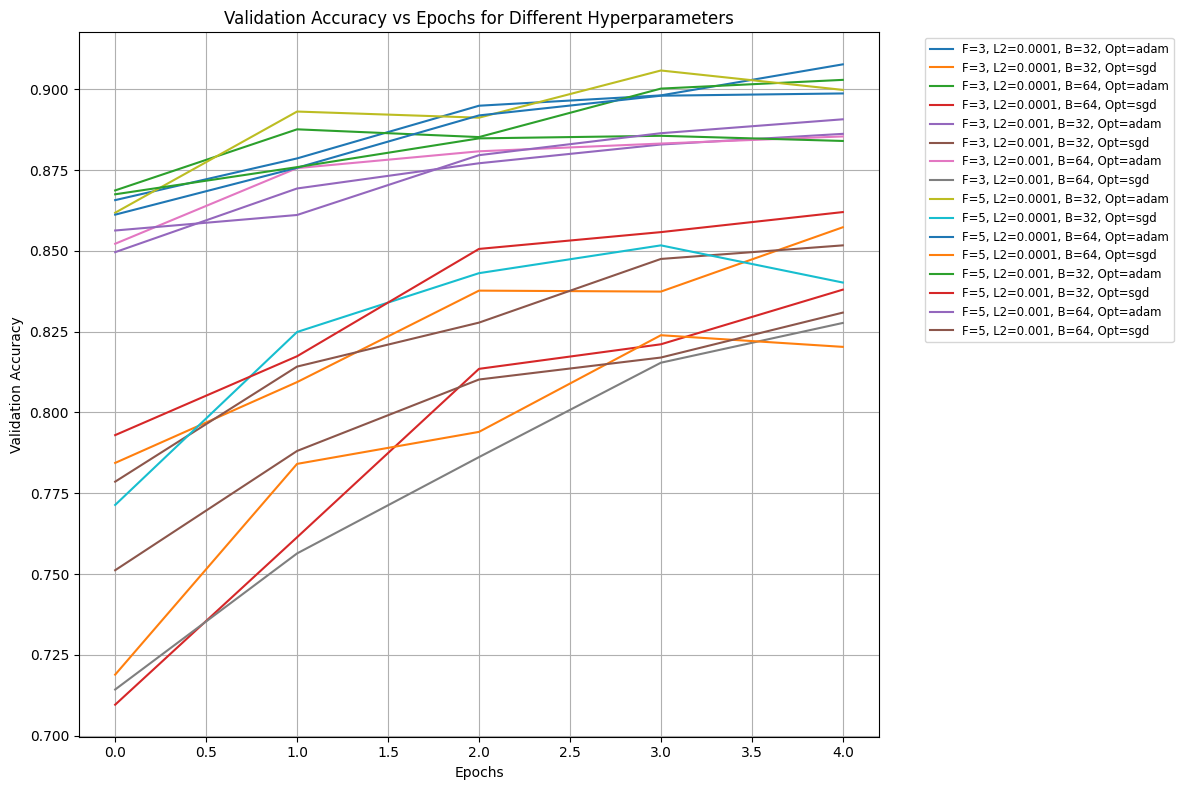

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Function to create CNN model
def create_model(filter_size=3, regularization=0.001, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu',
                      kernel_regularizer=regularizers.l2(regularization), input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu',
                      kernel_regularizer=regularizers.l2(regularization)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(regularization)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter options
filter_sizes = [3, 5]
regularizations = [0.0001, 0.001]
batch_sizes = [32, 64]
optimizers = ['adam', 'sgd']

# Dictionary to store training history
results = {}

# Loop over all hyperparameter combinations
for filter_size in filter_sizes:
    for regularization in regularizations:
        for batch_size in batch_sizes:
            for optimizer in optimizers:
                key = f"F={filter_size}, L2={regularization}, B={batch_size}, Opt={optimizer}"
                print(f"🔧 Training with {key}")
                model = create_model(filter_size, regularization, optimizer)
                history = model.fit(x_train, y_train, epochs=5,
                                    batch_size=batch_size,
                                    validation_data=(x_test, y_test),
                                    verbose=0)
                test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
                results[key] = history
                print(f"✅ Test accuracy: {test_acc:.4f}\n")

# Plot validation accuracy for all runs
plt.figure(figsize=(12, 8))
for key, history in results.items():
    plt.plot(history.history['val_accuracy'], label=key)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs for Different Hyperparameters')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
